In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
import seaborn as sns

In [72]:
rng = np.random.default_rng(1)
x = rng.normal(size =100)
y = x - 2 * x**2 + rng.normal(size =100)

<Axes: >

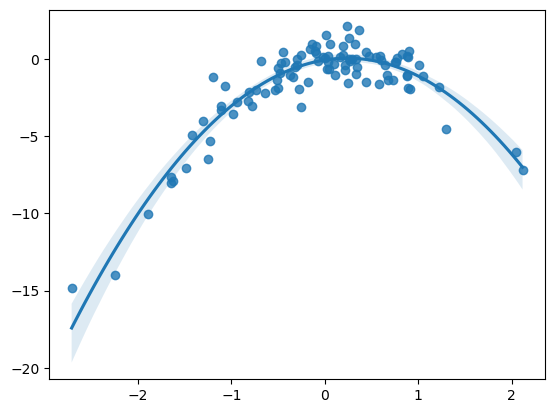

In [73]:
sns.regplot(x=x, y=y, order=2)

In [74]:
df = pd.DataFrame(x, columns=[1])
model = LinearRegression()
metric = cross_validate(model, df, y=y, cv=len(df), scoring='neg_mean_squared_error')

In [75]:
mse = -1 * np.sum(metric['test_score'])/len(metric['test_score'])
print(f"The mse with a 1 degree polynomial is : {mse}")

The mse with a 1 degree polynomial is : 6.633029839181983


In [67]:
for i in range(2,5):
    df = pd.DataFrame(x, columns=[1])
    for j in range(2,i+1):
        df[j] = x**j
    model = LinearRegression()
    metric = cross_validate(model, df, y=y, cv=len(df), scoring='neg_mean_squared_error')
    mse = -1 * np.sum(metric['test_score'])/len(metric['test_score'])

    df[0] = 1
    mod = sm.OLS(y, df).fit()
    print(mod.summary())
    print(f"The mse with a {i} degree polynomial is : {mse}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1069.
Date:                Thu, 04 Sep 2025   Prob (F-statistic):           8.44e-67
Time:                        12:23:49   Log-Likelihood:                -136.49
No. Observations:                 100   AIC:                             279.0
Df Residuals:                      97   BIC:                             286.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1              0.8107      0.096      8.447      0.0